In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Merge

In [2]:
fer2013 = pd.read_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\fer_clean.csv')
fer2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28350 entries, 0 to 28349
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   emotion        28350 non-null  int64 
 1    Usage         28350 non-null  object
 2    pixels        28350 non-null  object
 3   face_detected  28350 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 886.1+ KB


In [3]:
rafdb = pd.read_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\rafdb_clean.csv')
rafdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    pixels        11530 non-null  object
 1   emotion        11530 non-null  int64 
 2    Usage         11530 non-null  object
 3   face_detected  11530 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 360.4+ KB


In [4]:
affectnet = pd.read_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\affectnet_clean.csv')
affectnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27049 entries, 0 to 27048
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    pixels        27049 non-null  object
 1   emotion        27049 non-null  int64 
 2    Usage         27049 non-null  object
 3   face_detected  27049 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 845.4+ KB


In [5]:
tambah = pd.concat([rafdb, affectnet], ignore_index=True)

In [6]:
tambah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38579 entries, 0 to 38578
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    pixels        38579 non-null  object
 1   emotion        38579 non-null  int64 
 2    Usage         38579 non-null  object
 3   face_detected  38579 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [7]:
# emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = fer2013['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion']
emotion_counts

,emotion,number
0,3,7585
1,6,5377
2,4,4529
3,0,3975
4,2,3798
5,5,2736
6,1,350


In [8]:
average_count = emotion_counts['number'].mean()

In [9]:
emotion_counts['to_add'] = np.maximum(0, (average_count - emotion_counts['number']).astype(int))

In [10]:
tambah = tambah.sample(frac=1, random_state=42).reset_index()

In [11]:
final_data = []
for emotion, to_add in zip(emotion_counts['emotion'], emotion_counts['to_add']):
    # Ambil sejumlah data dari dataset tambahan sesuai kebutuhan
    data_tambah = tambah[tambah['emotion'] == emotion].head(to_add)
    
    # Tambahkan data ke dataset utama
    final_data.append(data_tambah)

In [12]:
data_tambahan = pd.concat(final_data)
data_tambahan = data_tambahan.drop(columns=['index'])
data_tambahan.reset_index(drop=True, inplace=True)

In [13]:
final_dataset = pd.concat([fer2013, data_tambahan], ignore_index=True)

In [14]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33277 entries, 0 to 33276
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   emotion        33277 non-null  int64 
 1    Usage         33277 non-null  object
 2    pixels        33277 non-null  object
 3   face_detected  33277 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [15]:
final_dataset.head()

,emotion,Usage,pixels,face_detected
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,1
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...,1
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...,1
3,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,1
4,2,Training,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,1


In [16]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = final_dataset['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,7585
1,Neutral,5377
2,Sad,4529
3,Angry,4050
4,Fear,4050
5,Surprise,4050
6,Disgust,3636


C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\2536846650.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\2536846650.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


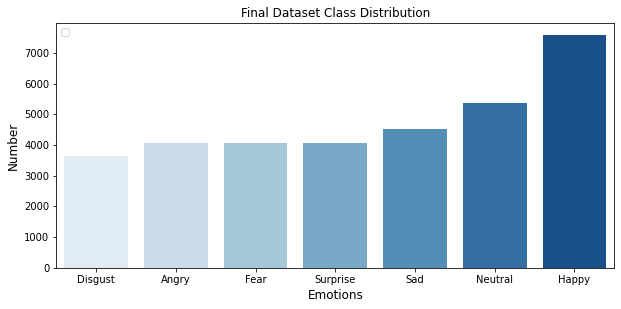

In [17]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Final Dataset Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a legend to display the average line label
plt.legend()

plt.show()

In [18]:
final_dataset = final_dataset[['emotion', ' pixels']].rename(columns={' pixels': 'pixel'})
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33277 entries, 0 to 33276
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  33277 non-null  int64 
 1   pixel    33277 non-null  object
dtypes: int64(1), object(1)
memory usage: 520.1+ KB


In [ ]:
final_dataset.to_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\base.csv', index=False)

## Split data train, validation dan test

In [19]:
# Pertama, pisahkan data train (90%) dan test (10%)
data_train_val, data_test = train_test_split(final_dataset, test_size=0.1, stratify=final_dataset['emotion'], random_state=42)

In [20]:
data_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29949 entries, 109 to 12323
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  29949 non-null  int64 
 1   pixel    29949 non-null  object
dtypes: int64(1), object(1)
memory usage: 701.9+ KB


In [21]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data_train_val['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,6827
1,Neutral,4839
2,Sad,4076
3,Angry,3645
4,Surprise,3645
5,Fear,3645
6,Disgust,3272


C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\2403482571.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\2403482571.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


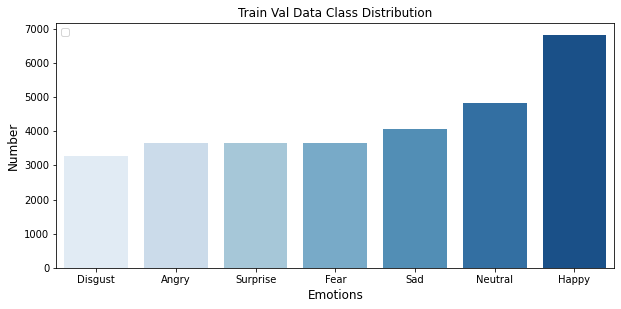

In [22]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Train Val Data Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a legend to display the average line label
plt.legend()

plt.show()

In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3328 entries, 19513 to 22303
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  3328 non-null   int64 
 1   pixel    3328 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [24]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data_test['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,758
1,Neutral,538
2,Sad,453
3,Fear,405
4,Angry,405
5,Surprise,405
6,Disgust,364


C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\2766979976.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\2766979976.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


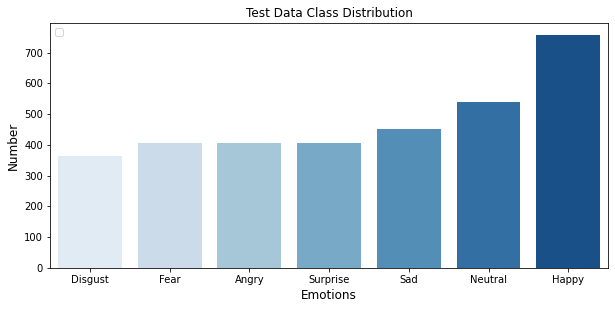

In [25]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Test Data Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a legend to display the average line label
plt.legend()

plt.show()

In [27]:
data_train_val.to_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\train_val.csv', index=False)

In [28]:
data_test.to_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\test.csv', index=False)

## Downsampling

In [30]:
data_train_val.head()

,emotion,pixel
109,0,254 253 253 245 215 175 179 137 62 29 25 50 11...
17677,3,21 24 28 30 24 24 21 26 31 31 38 59 92 125 148...
30661,1,126 116 117 127 126 139 157 183 205 225 237 22...
6126,6,255 255 255 255 255 255 254 255 239 49 20 6 0 ...
21726,3,172 171 176 179 125 77 97 129 146 161 163 158 ...


In [31]:
emotion_counts = data_train_val['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion']
emotion_counts

,emotion,number
0,3,6827
1,6,4839
2,4,4076
3,0,3645
4,5,3645
5,2,3645
6,1,3272


In [33]:
balanced_data = []
for emotion, count in zip(emotion_counts['emotion'], emotion_counts['number']):
    emotion_data = data_train_val[data_train_val['emotion'] == emotion]
    if count > 3645:
        # Downsample data
        downsampled_data = emotion_data.sample(n=int(3645), random_state=42)
        balanced_data.append(downsampled_data)
    else:
        # Tidak perlu downsampling, tambahkan data asli
        balanced_data.append(emotion_data)

In [34]:
downsample = pd.concat(balanced_data)

In [35]:
downsample = downsample.sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
downsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25142 entries, 0 to 25141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  25142 non-null  int64 
 1   pixel    25142 non-null  object
dtypes: int64(1), object(1)
memory usage: 393.0+ KB


In [37]:
downsample.head()

,emotion,pixel
0,5,65 53 43 37 29 27 27 29 30 33 34 34 32 30 28 2...
1,1,173 190 199 215 217 224 221 223 228 229 229 23...
2,1,78 80 83 84 86 112 143 151 150 142 92 153 113 ...
3,6,67 93 97 83 63 54 72 57 57 57 46 36 56 51 48 4...
4,0,151 155 154 159 162 163 164 164 164 169 173 17...


In [38]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = downsample['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Surprise,3645
1,Neutral,3645
2,Angry,3645
3,Happy,3645
4,Fear,3645
5,Sad,3645
6,Disgust,3272


C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\246477380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
C:\Users\MoKha\AppData\Local\Temp\ipykernel_23860\246477380.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


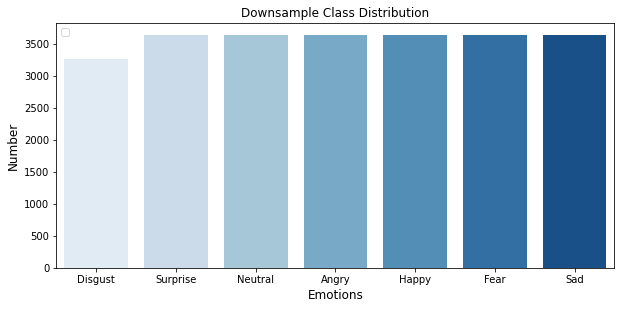

In [39]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Downsample Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a legend to display the average line label
plt.legend()

plt.show()

In [40]:
downsample.to_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\balance_train_val.csv', index=False)